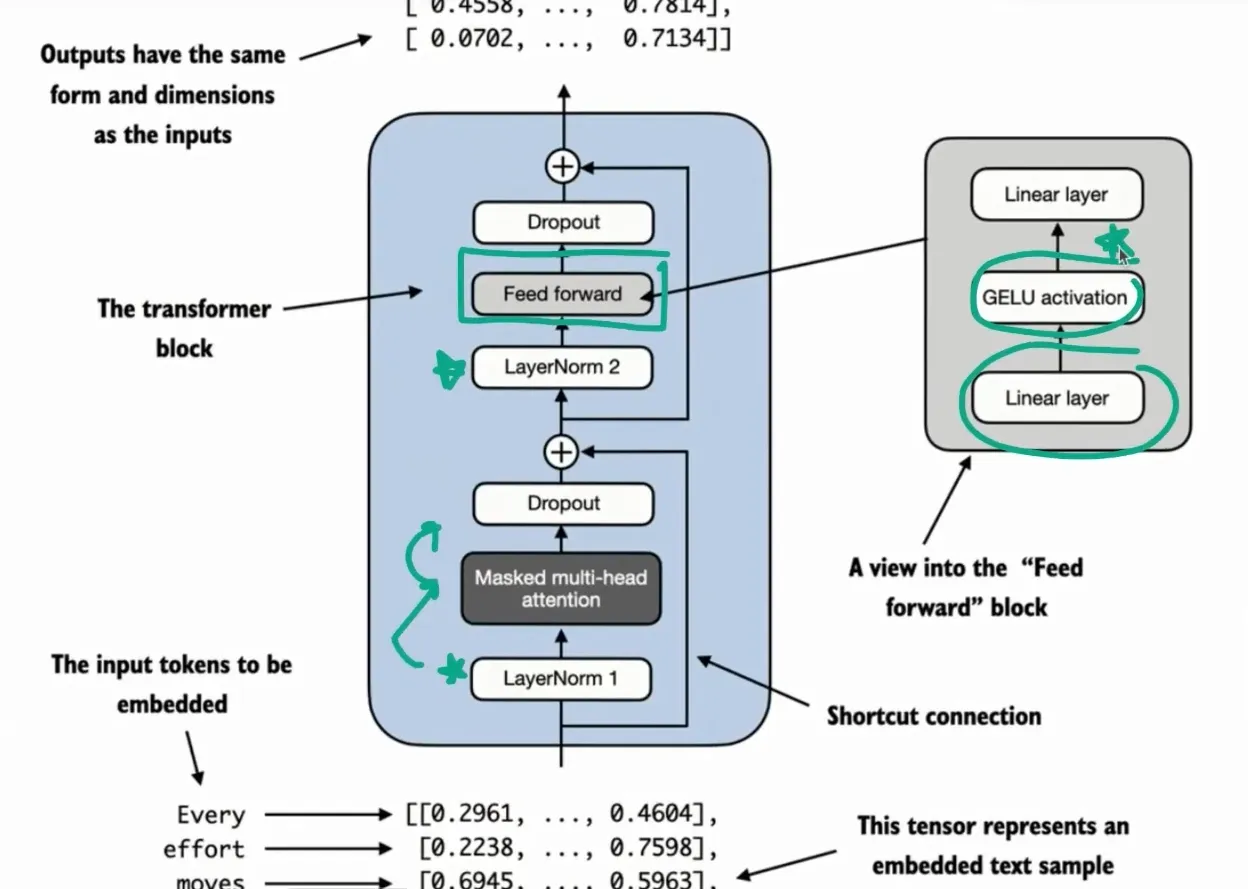

# FeedForward Neural Network with GELU Activation Function

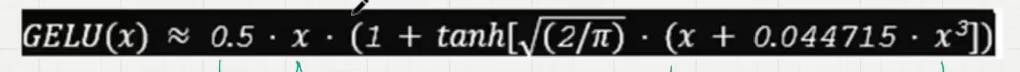

In [1]:
import torch
import torch.nn as nn
class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.004715 * torch.pow(x, 3))
        ))

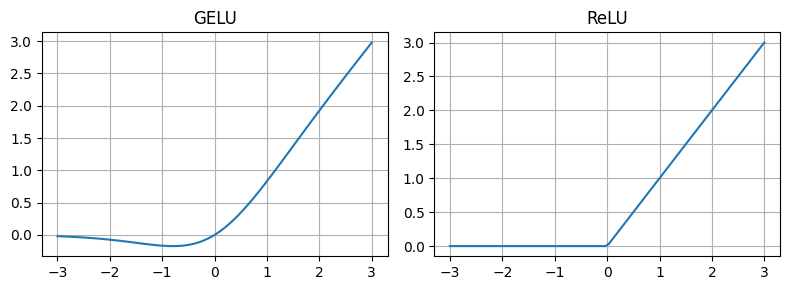

In [2]:
import matplotlib.pyplot as plt
import numpy
torch.manual_seed(123)
gelu, relu = GELU(), nn.ReLU()

x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ['GELU', 'ReLU'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(x.numpy(), y.numpy())
    plt.title(label)
    plt.grid()

plt.tight_layout()
plt.show()

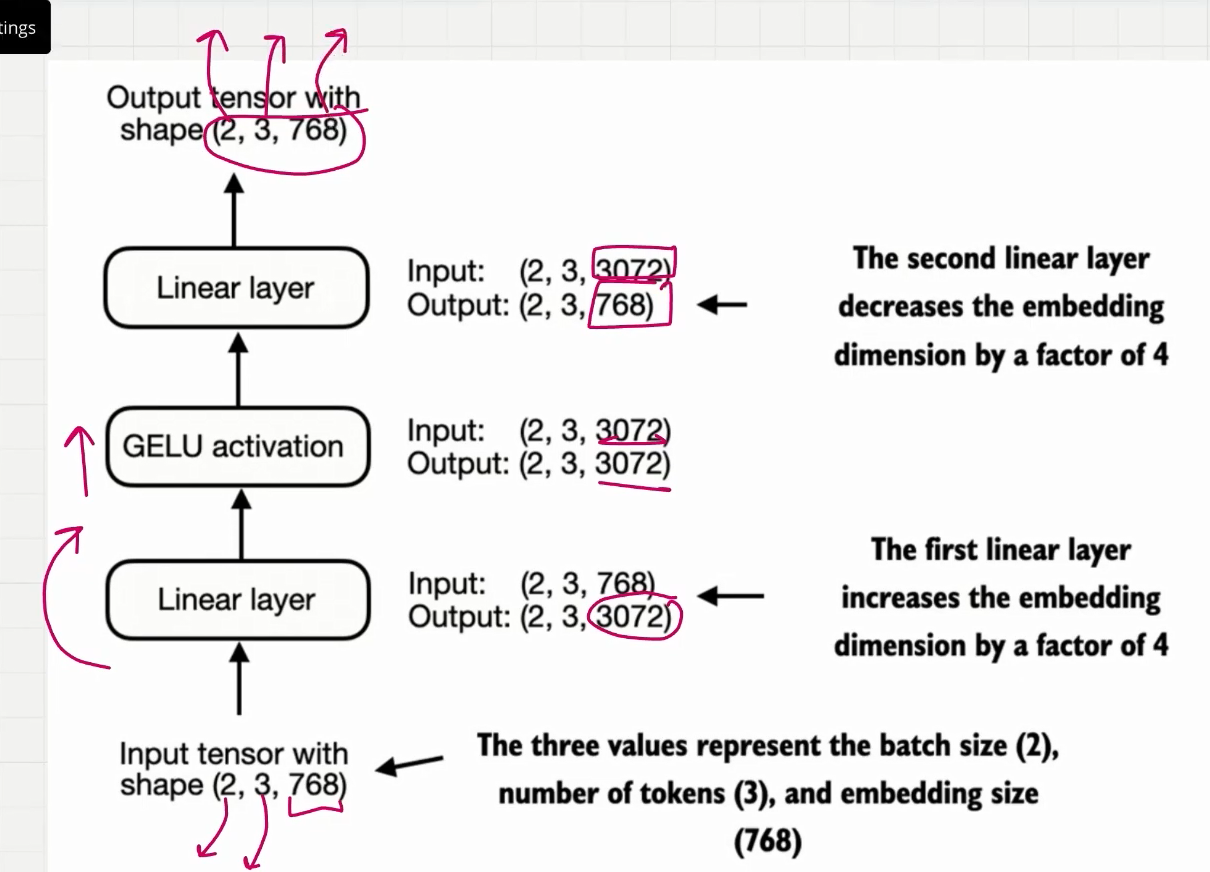

In [8]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 1024,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

In [9]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]), # Expansion
            GELU(), # Activation
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]), # Contraction
        )

    def forward(self, x):
        return self.layers(x)

In [10]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.randn(2, 3, GPT_CONFIG_124M["emb_dim"])
out = ffn(x)
print(out.shape)  # Expected output shape: (2, 3, 768)

torch.Size([2, 3, 768])
